In [8]:
import matplotlib.pyplot as plt
import numpy as np

from configurations.configs import NoiseConfig
from noises.applier import NoiseApplier

In [2]:
noise_configs = [
    NoiseConfig("white_noise_snr_10dB", "white", {"snr_db": 10}),
    NoiseConfig("pink_noise_variance_0.2", "pink", {"mean": 30, "variance": 0.2}),
    NoiseConfig("red_noise_snr_5dB", "red", {"snr_db": 5}),
    NoiseConfig(
        "mixed_white_blue",
        "mix",
        {"noises": [{"color": "white", "variance": 0.1}, {"color": "blue", "variance": 0.3}], "weights": [0.7, 0.3]},
    ),
    NoiseConfig(
        "mixed_noise_with_snr",
        "mix",
        {
            "noises": [{"color": "pink", "variance": 1}, {"color": "red", "variance": 1}],
            "weights": [0.5, 0.5],
            "snr_db": 8,
        },
    ),
]

In [5]:
fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
original_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

In [6]:
noise_applier = NoiseApplier(original_signal)
noisy_signals = noise_applier.apply(noise_configs)

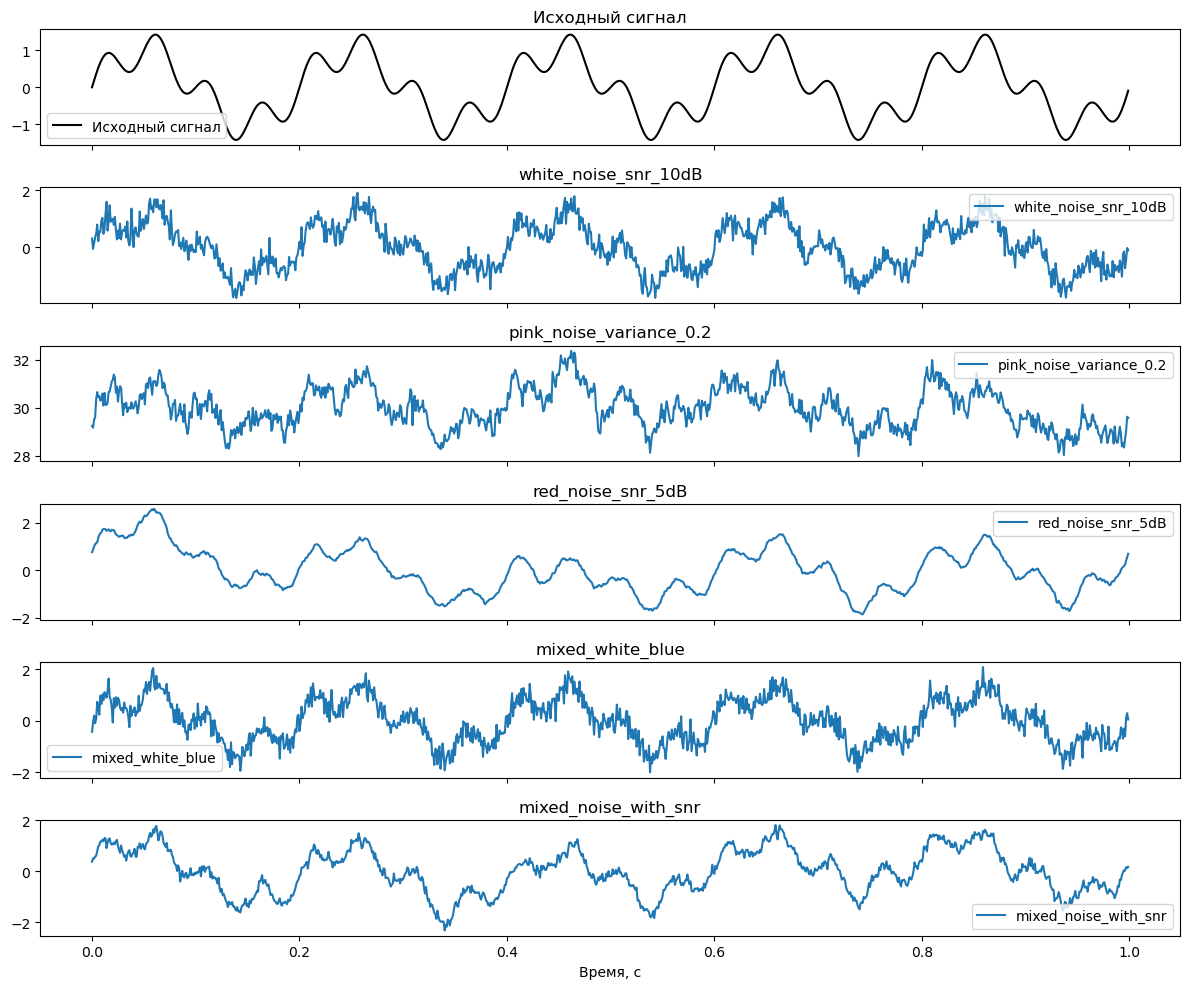

In [7]:
fig, axes = plt.subplots(len(noisy_signals) + 1, 1, figsize=(12, 10), sharex=True)
axes[0].plot(t, original_signal, label="Исходный сигнал", color="k")
axes[0].set_title("Исходный сигнал")
axes[0].legend()
for i, (name, signal) in enumerate(noisy_signals.items()):
    ax = axes[i + 1]
    ax.plot(t, signal, label=name)
    ax.set_title(name)
    ax.legend()

plt.xlabel("Time, c")
plt.tight_layout()
plt.show()